## 순차데이터
- 텍스트 : I am a boy
    - 단어의 순서가 중요한 데이터
- 시계열 데이터 : 1일 20도, 2일 15도, 3일 17도
    - 날짜의 순서가 중요한 데이터
    
- 이런 순차데이터는 지금 데이터를 분석할 때 이전 데이터를 기억하고 있어야 함
    - ex. "별로지만 추천해요" 의 긍/부정 판단을 한다고 하면
        - 현재 보는 단어가 [추천해요] 가 입력될 때 이전 단어인 [별로지만] 을 기억해야 함
        - 추천해요가 있다고 무조건 긍정으로 판단할 수는 없다

## 순환 신경망

### 완전 연결 신경망 vs 순환 신경망
- 완전 연결 신경망은 기억 기능이 없다
- 입력 데이터의 흐름이 앞으로만 전달되는 신경망
    - 피드포워드 신경망(완전연결, 합성곱)
    - 샘플 처리하는데 재사용 하기 위해서는 데이터의 흐름이 앞으로만 전달되면 안된다
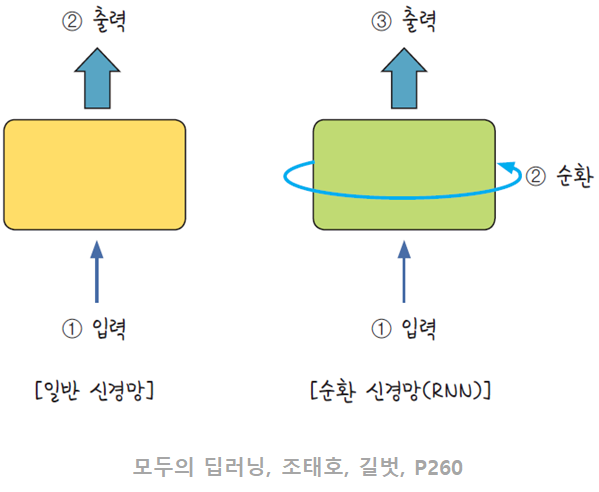

### 순환 신경망
- 일반적인 완전 연결 신경망과 거의 비슷
    - 완전 연결 신경망에 고리 하나를 추가한다
    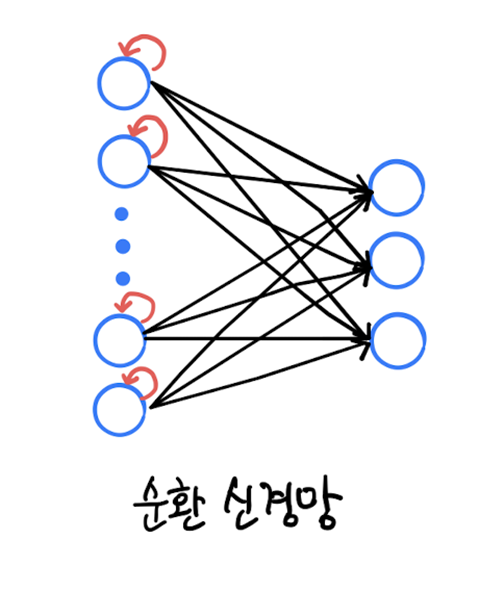
    - 뉴런의 출력이 다시 자기 자신으로 전달
        - 다음 인풋이 있을 때 까지 기억해야 함

- 한 개의 뉴런
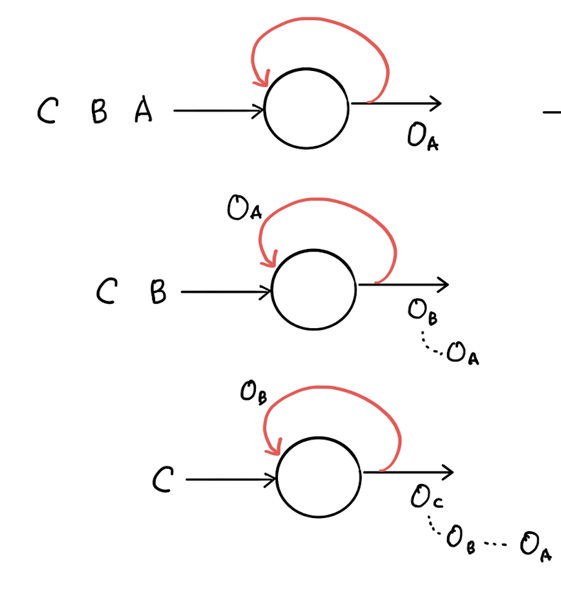
- 여기서의 샘플은 샘플의 부분을 의미함
    - I am a boy 샘플이면 각 토큰을 의미
- A,B,C 3개의 샘플을 처리하는 순환 신경망의 뉴런이 있다고 가정하면 o는 출력된 결과
    1. 첫번째 샘플 A를 처리하고 난 출력 oA가 다시 뉴런으로 들어감
    2. 두번재 샘플 B를 처리할 때 A 를 사용해서 만든 출력 oA 를 함께 사용
    3. oA와 B를 사용해서 만드는 출력 oB에는 A에 대한 정보가 어느 정도  포함되어 있을 것임
    4. oB와 C를 사용해서 만드는 출력 oC 에는 B와 C에 대한 정보가 어느정도 포함되어 있을 것임. 단 oC에는 A 보다는 B 의 정보가 더 많이 들어있다고 생각할 수 있다.
        - 그러므로 타임스텝이 길어지면 앞의 샘플_A 는 희석되어진다(단점)

### 타임스텝
- 샘플을 처리하는 한 단계
- 오래 될 수록 순환정보는 희미해 짐
- 하나의 뉴런이 샘플하나를 처리하는 한 단계
    - ex. 샘플 "별로지만 추천합니다" 
        - 1개의 뉴런이
        - 타입스텝 1에서 (별로지만)
        - 타임스텝 2에서 (타입스텝 1에서 산출한 별로지만의 출력값)(추천합니다)
        - 를 처리하게 된다

### 셸
- 모델의 층
- 셸에 여러개의 뉴런이 있지만 뉴런을 모두 표시하지 않고 하나의 셸로 층을 표시
- 은닉상태 : 셸의 출력
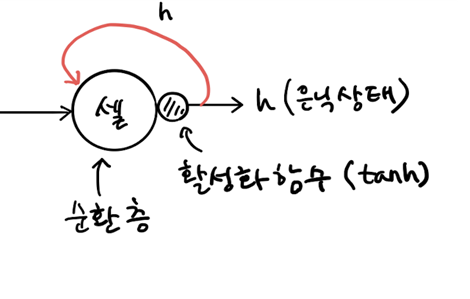
- **알고리즘 마다 부르는 이름이 다를 수는 있지만 기본구조는 동일하다**
- 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음층으로 보냄

### 순환 신경망의 활성화 함수
- 주로 하이퍼볼릭 탄젠트 함수(tah)를 주로 사용한다
    - 범위가 -1 ~ +1 (시그모이드보다 출력범위가 넓음)
    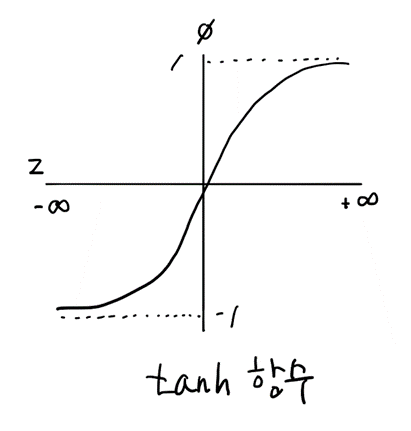
    
### 순환 신경망의 가중치
- 피드 포워드(앞으로만 출력을 전달하는 뉴런)인 신경망의 뉴런은 입력과 가중치를 곱한다.
- 순환 신경망도 동일하지만 가중치가 한개 더 있음 : **이전 타임스탬프의 은닉상태에 곱해지는 가중치**

- 아래 이미지는 한개의 뉴런을 타임스텝으로 펼쳤을 때
    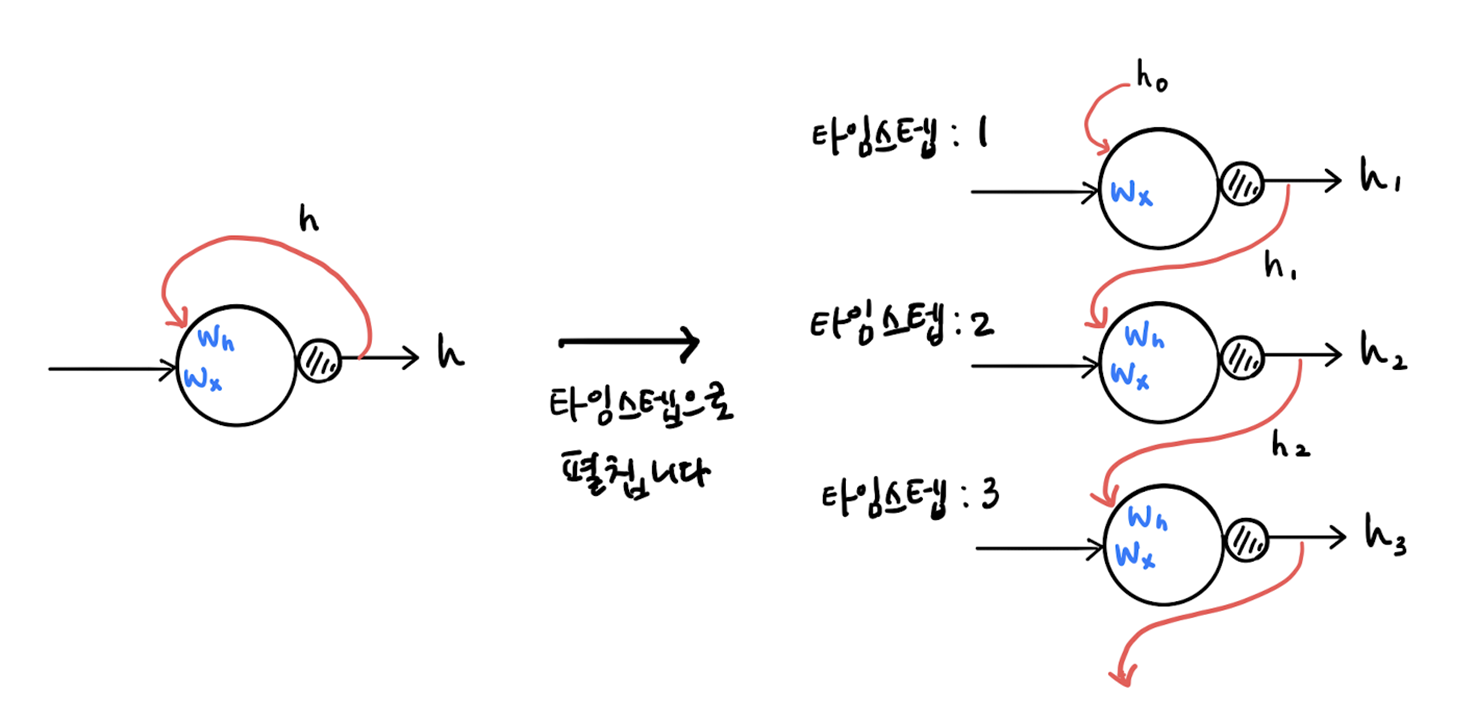
    - 맨 처음 타임스탭 h0는????
        - 이전 타임스탭이 없으므로 0으로 초기화

## 셸의 가중치와 입출력
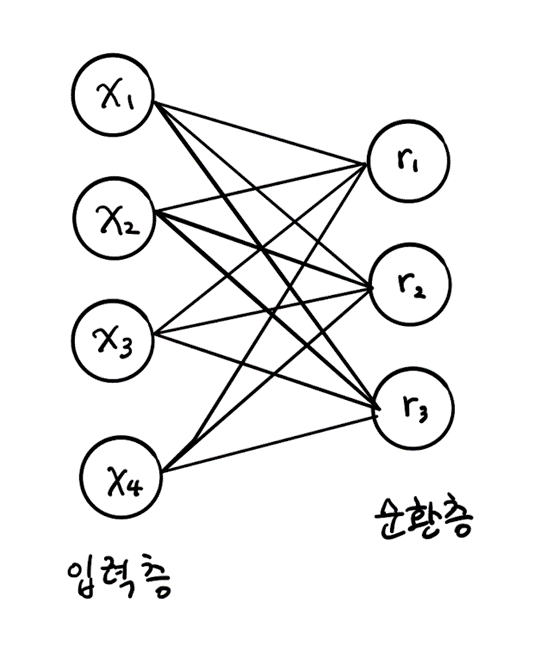
- 위 이미지에서 처럼 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정했을 때의 가중치의 개수는????
    - 특성(4) * 뉴런(3)  = 12개
    - 은닉상태의 가중치 : 은닉상태의 크기(뉴런 * 뉴런) => 9
        - 순환층의 뉴런들은 자기들끼리도 완전연결 된다
        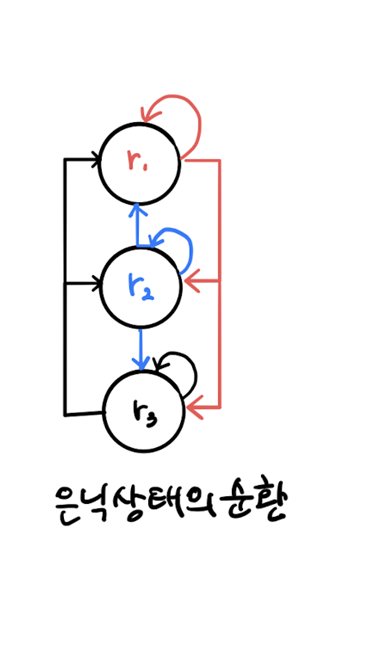

- 모델의 파라미터 수
    - 순환층에 입력되는 각 특성에 대한 가중치 + 은닉상태의 순환 가중치 + 절편
        -  12 + 9 + 3 => 24

### 순환층의 입력과 출력

- 샘플마다 2개의 차원을 갖는다.
    - 샘플은 하나의 시퀀스라고 함
    - 시퀀스의 길이가 타임 스텝
    - 샘플은 시퀀스의 길이 * 단어 표현 벡터차원의 2차원)

- ex. 어떤 샘플(시퀀스)에 "I am a boy" 라는 문장이 있다면
    - 각 단어를 3개의 어떤 숫자로 표현한다고 가정할 때(단어의 표현 길이는 같아야 함, 단어 숫자표현은 텍스트의 표현방법에 따라 달라짐)
    - 이 문장의 차원은 아래 그림과 같다(단어가 벡터 표현이므로 1,3 으로 표현됨
    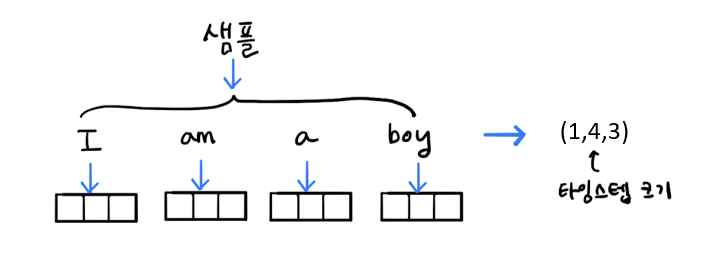
    - 순환층을 통과하면 순환층의 뉴런 개수만큼 출력이 됨
        - 차원이 변함(1차원 배열 - 배열의 크기는 뉴런의 개수에 의해 결정)
     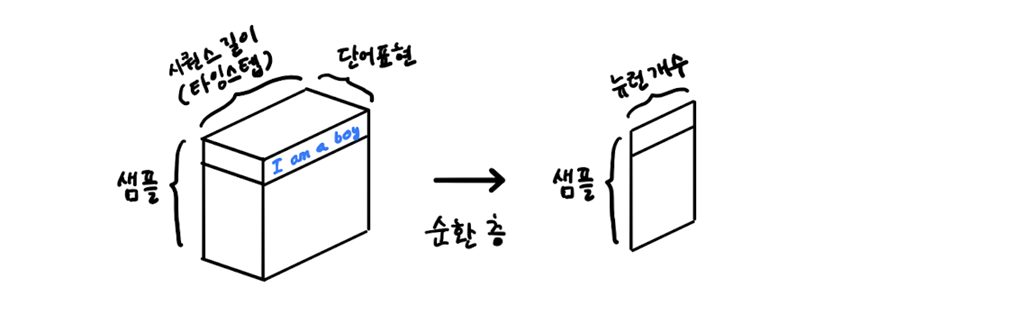

**순환층은 모든 타임스텝에서출력을 만든 것처럼 표현하지만 실제 알고리즘은 마지막 타임 스텝의 은닉상태만 출력으로 내보낸다**


- 입력 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달함 
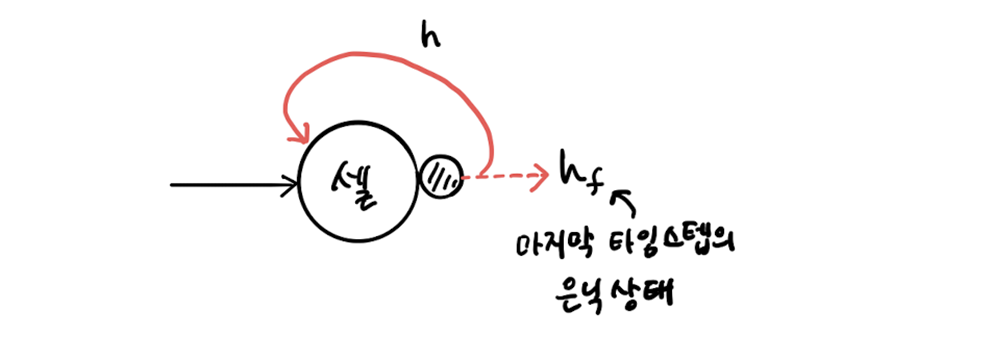

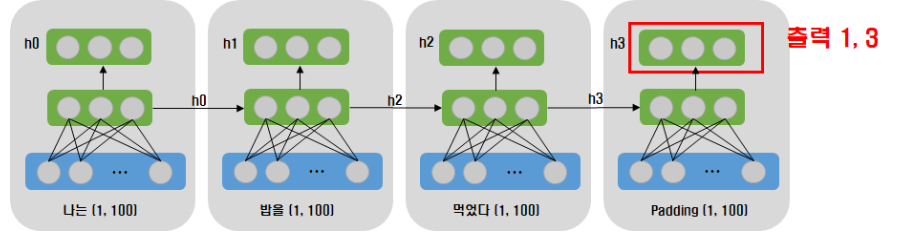

- 순환층을 여러개 쌓으면 셀의 출력은?
    - 셀의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열
    - 첫번째 셀(첫번째 순환층)은 모든 타입스템의 은닉상태출력
    - 두번째 셀(마지막 순환층)은 마지막 타임스텝의 은닉상태 출력
    - 순환신경망 알고리즘 객체 생성시 return_sequences=True로 설정
    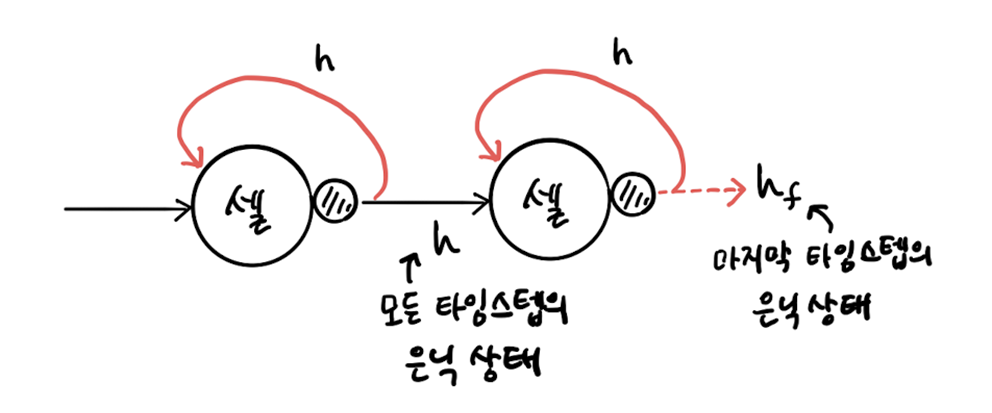
    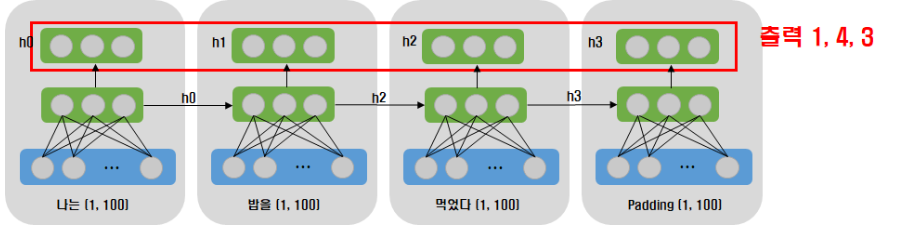

### 출력층
- 마지막에는 밀집층을 두어 클래스를 분류
    - 다중 분류 : 분류 개수만큼 뉴런
    - 이진 분류 : 1개의 뉴런
    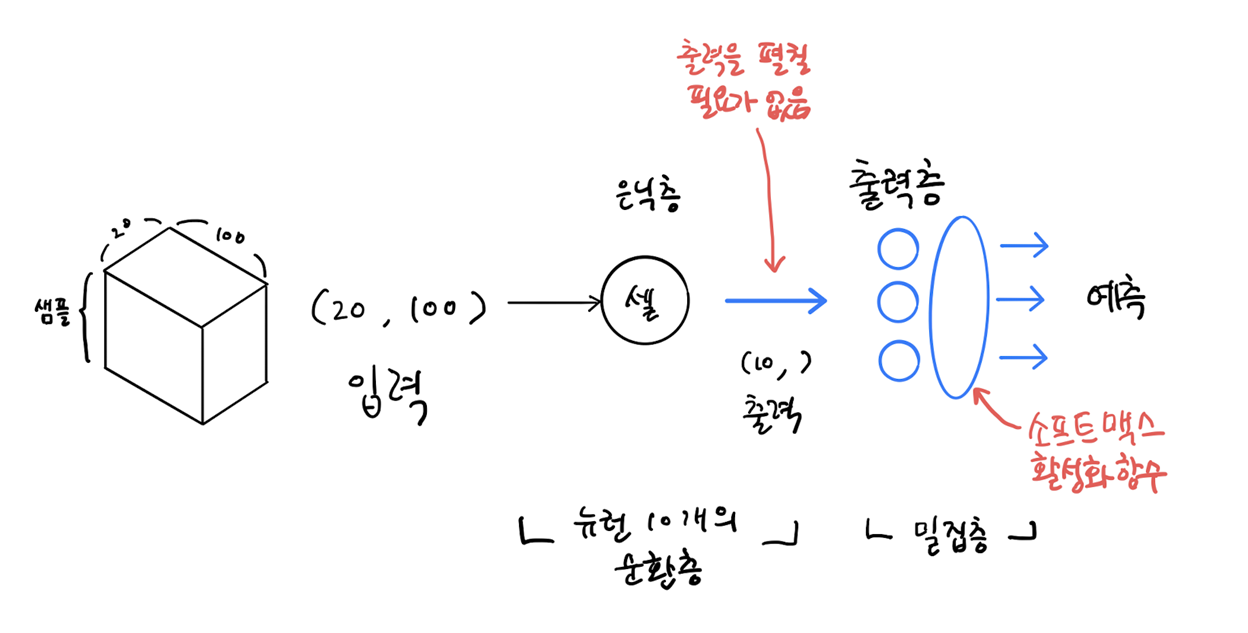